In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

import joblib
import warnings
warnings.filterwarnings('ignore')

In [148]:
df = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

In [149]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [150]:
df.shape

(858, 36)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [152]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
df.duplicated().sum()

23

In [154]:
df = df.drop_duplicates()

In [155]:
cat_columns = df.select_dtypes(include='object').columns
for col in cat_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Column: Number of sexual partners
Number of sexual partners
2.0     266
3.0     207
1.0     193
4.0      76
5.0      44
?        25
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: count, dtype: int64
------------------------------
Column: First sexual intercourse
First sexual intercourse
15.0    157
17.0    149
18.0    134
16.0    120
14.0     72
19.0     58
20.0     35
13.0     25
21.0     20
23.0      9
22.0      9
?         7
26.0      7
12.0      6
27.0      6
24.0      6
29.0      5
28.0      3
11.0      2
25.0      2
10.0      2
32.0      1
Name: count, dtype: int64
------------------------------
Column: Num of pregnancies
Num of pregnancies
1.0     253
2.0     235
3.0     138
4.0      74
?        56
5.0      35
6.0      18
0.0      16
7.0       6
8.0       2
11.0      1
10.0      1
Name: count, dtype: int64
------------------------------
Column: Smokes
Smokes
0.0    699
1.0    123
?       13
Name: count, dtype: int64
--------------------

In [156]:
df = df.replace('?', np.nan)

In [157]:
df = df.apply(pd.to_numeric, errors='coerce')

In [158]:
df.isna().sum()

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

In [159]:
missing_percent = df.isnull().mean() * 100
cols_to_drop = missing_percent[missing_percent > 80].index.tolist()
df = df.drop(columns=cols_to_drop)

In [160]:
df = df.fillna(df.median())

In [161]:
df.duplicated().sum()

5

In [162]:
df = df.drop_duplicates()

In [163]:
df['Biopsy'].value_counts()

Biopsy
0    776
1     54
Name: count, dtype: int64

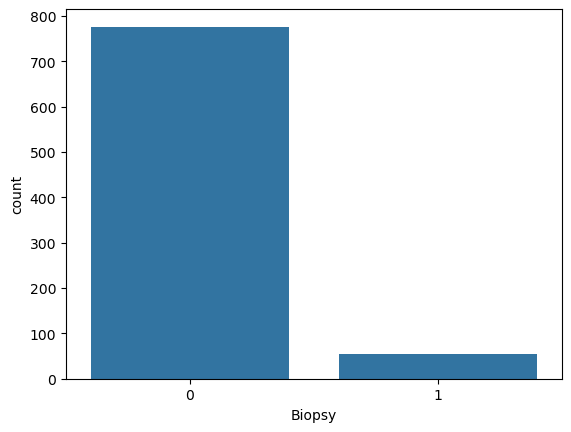

In [164]:
sns.countplot(x='Biopsy', data=df)
plt.show()

In [165]:
X = df.drop('Biopsy', axis=1)
y = df['Biopsy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
print(f"Before SMOTE: {X.shape}")
print(f"Class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")

smote = SMOTE(random_state=42, sampling_strategy=0.5)
X, y = smote.fit_resample(X, y)

print(f"\nAfter SMOTE: {X.shape}")
print(f"Class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")
print("✅ SMOTE applied successfully")

Before SMOTE: (830, 33)
Class distribution: {0: 776, 1: 54}

After SMOTE: (1164, 33)
Class distribution: {0: 776, 1: 388}
✅ SMOTE applied successfully


In [167]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [168]:
y_pred_train = rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("Test Accuracy: %.2f%%" % (accuracy_test * 100.0))

Train Accuracy: 100.00%
Test Accuracy: 96.39%


In [169]:
print ("classification Report for Training")
print ("---------------------------------------")
print(classification_report(y_train, y_pred_train))

classification Report for Training
---------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       619
           1       1.00      1.00      1.00        45

    accuracy                           1.00       664
   macro avg       1.00      1.00      1.00       664
weighted avg       1.00      1.00      1.00       664



In [170]:
print ("classification Report for Testing")
print ("---------------------------------------")

print(classification_report(y_test, y_pred_test))

classification Report for Testing
---------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.71      0.56      0.62         9

    accuracy                           0.96       166
   macro avg       0.84      0.77      0.80       166
weighted avg       0.96      0.96      0.96       166



In [171]:
print("CONFUSION MATRIX - TEST SET")
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
print("\nFormat: [[TN, FP],")
print("         [FN, TP]]")

CONFUSION MATRIX - TEST SET
[[155   2]
 [  4   5]]

Format: [[TN, FP],
         [FN, TP]]


In [172]:
# Save model
joblib.dump(rf, "model.pkl")

# Save feature names
joblib.dump(X.columns.tolist(), "features.pkl")

# Save medians
joblib.dump(df.median(), "medians.pkl")

# Save dropped columns
joblib.dump(cols_to_drop, "cols_to_drop.pkl")


['cols_to_drop.pkl']